# FUNDAMENTOS DE MACHINE LEARNIG

## DEFINICIÓN

#### Andrew Ng, Universidad de Stanford: 
"La ciencia de hacer que las computadoras actúen sin estar explícitamente programadas"

#### Nvidia:
"Práctica de usar algoritmos para analizar datos, aprender de ellos y luego hacer una determinación o predicción sobre algo en el mundo".

#### McKinsey y Compañía:
"Machine Learning se basa en algoritmos que pueden aprender de los datos sin depender de la programación basada en reglas".

#### Tom Mitchell, Dpto.  Machine Learning, Universidad Carnegie Mellon:
"Machine Learning busca responder a la pregunta ¿cómo podemos construir sistemas informáticos que mejoren automáticamente con la experiencia, y cuales son las leyes fundamentales que rigen todos los procesos de aprendizaje?"

## GRAN DEFINICIÓN
El Aprendizaje Automático o Machine Learning, es utilizar algoritmos para que puedan decir algo interesante con base en un conjunto de datos sin tener que escribir ningún código específico para el problema.

## EJEMPLOS APLICADOS

#### ALGORITMOS DE CLASIFICACIÓN A SPAM
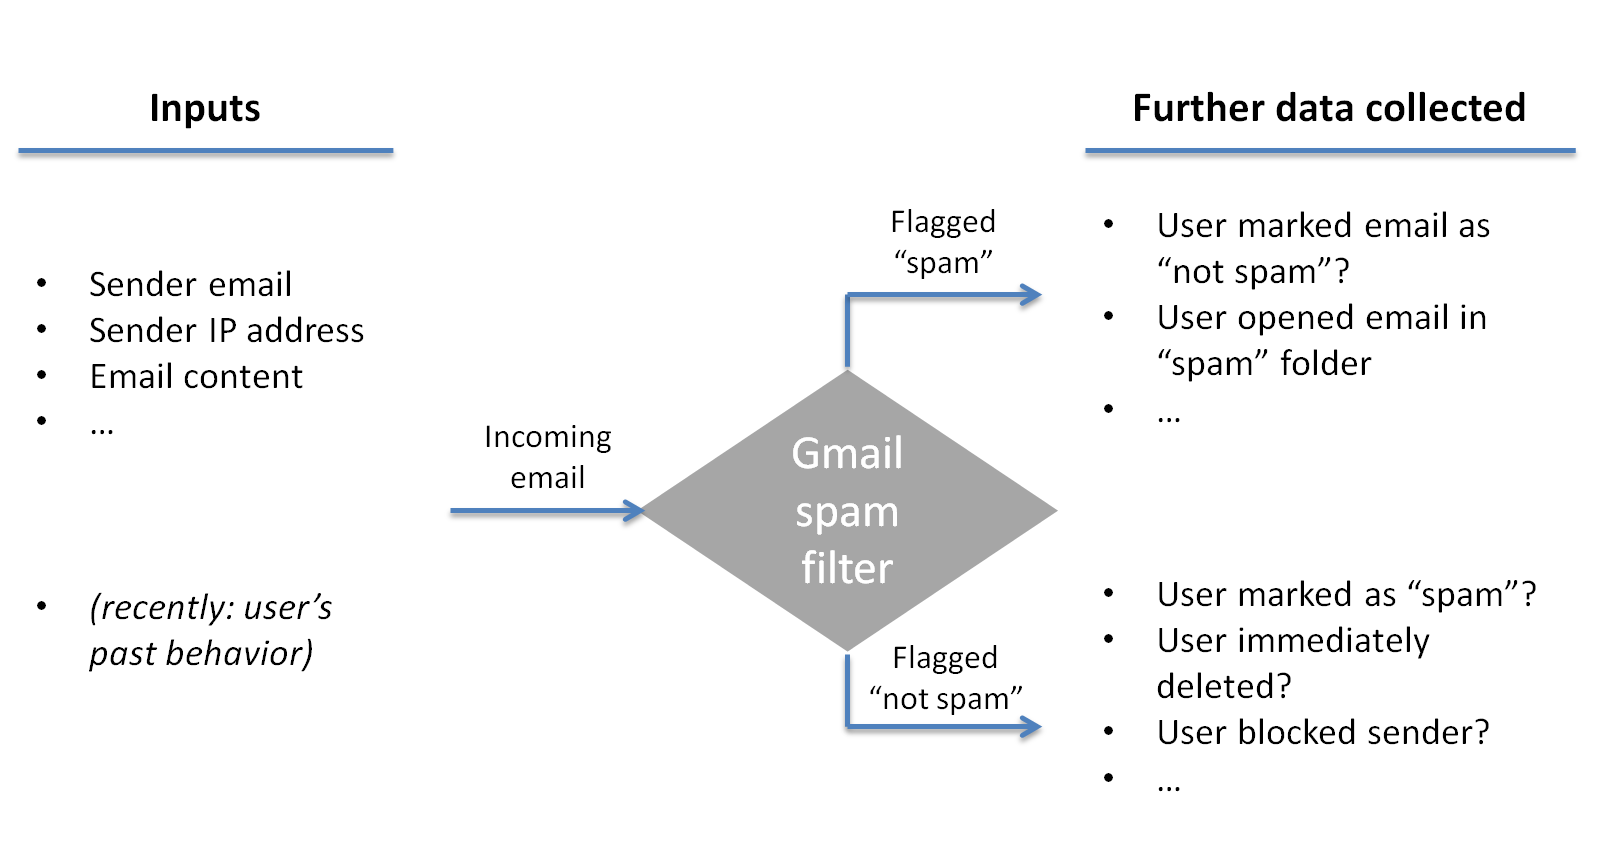

#### ALGORITMOS DE PREDICCIÓN DE NETFLIX
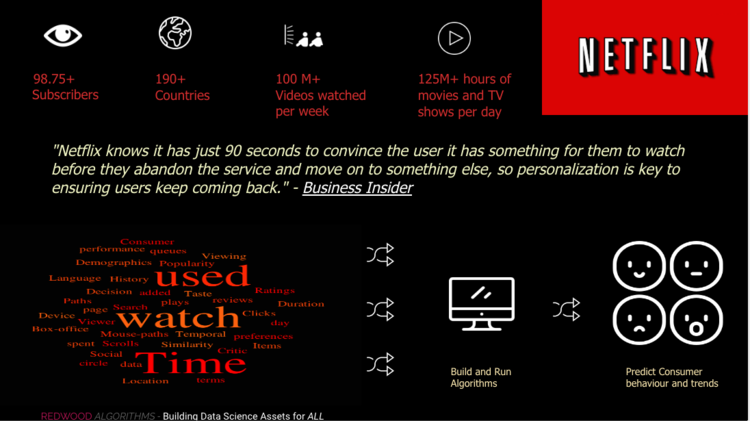

# CLASIFICACIÓN

Cada vez se mejoran las tecnologías y por consiguiente se desarrollan nuevos algoritmos, sin embargo podemos decir que Machine Learning se clasifica en 4 RAMAS:


### 1. APRENDIZAJE SUPERVISADO = "LOS DATOS ESTÁN ETIQUETADOS"
* Asigna datos de entrada a objetivos conocidos. Ej: reconocimiento de voz, clasificación de imágenes, traducción de idiomas, etc.

* Entrenamiento con etiquetas correctas asociadas

* El algoritmo aprenderá la relación entre los datos y sus etiquetas y aplicará esa relación aprendida para clasificar datos completamente nuevos que la máquina no haya vista antes

* Consiste principalmente en clasificación y regresión.

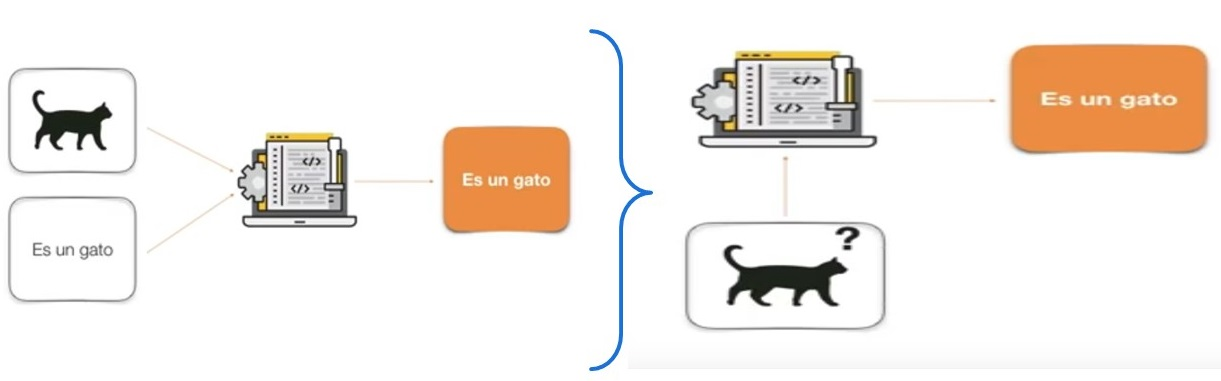

### OTRAS VARIACIONES

#### a) GENERACIÓN DE SECUENCIA:
Dada una imagen, predice un título que la describa. La generación de secuencias a veces puede reformularse como una serie de problemas de clasificación (cómo predecir repetidamente una palabra o token en una secuencia).

#### b) PREDICCIÓN DEL ÁRBOL DE SINTAXIS:
Dada una oración, predice su descomposición en un árbol de sintaxis.

#### c) DETECCIÓN DE OBJETOS:
Dada una imagen, dibuje un cuadro delimitador alrededor de ciertos objetos dentro de la imagen. Problema conjunto de clasificación y regresión, donde las coordenadas del cuadro delimitador se predicen mediante regresión vectorial.

#### d) SEGMENTACIÓN DE IMAGEN:
Dada una imagen, dibuja una máscara de nivel de píxel en un objeto específico.


### 2. APRENDIZAJE NO SUPERVISADO = "COMIENZA CON DATOS NO ETIQUETADOS"

* Encontrar transformaciones interesantes de los datos de entrada sin la ayuda de ningún objetivo.
* Es la base del análisis de datos, y a menudo es un paso necesario para comprender mejor un conjunto de datos antes de intentar resolver un problema de aprendizaje supervisado

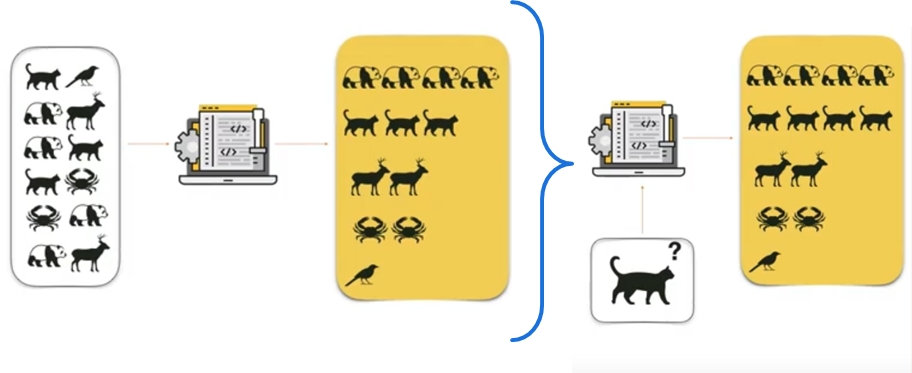

El algoritmo aprenderá a agrupar los tipos de animales, por ende cuando se le introduzca un nuevo animal, podrá aplicar esa relación aprendida y determinar a qué grupo pertenece.



### 3. APRENDIZAJE AUTO SUPERVISADO = "LA MÁQUINA APRENDE POR SU CUENTA (ENSAYO - ERROR)"

* Un agente recibe información sobre su entorno y aprende a elegir acciones que maximicen alguna recompensa.
* Es principalmente un área de investigación y aún no ha tenido éxitos prácticos significativos más allá de los juegos.

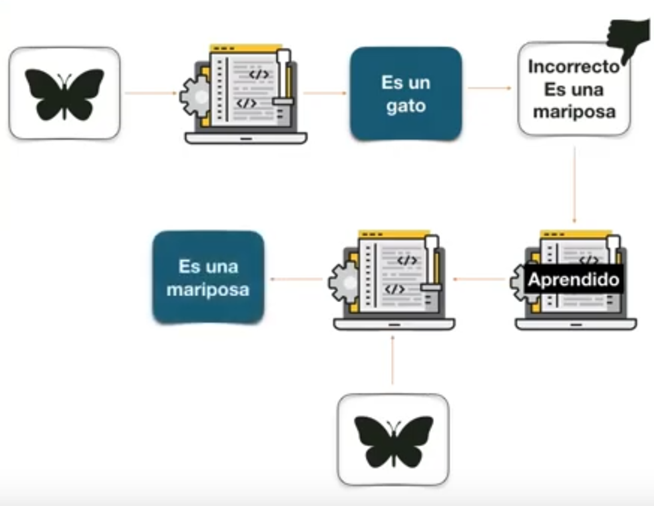

* El algoritmo aprende de la experiencia, recoge los ejemplos de entrenamiento ("esta acción fue buena – esta acción fue mala") a través de ensayo y error mientras intenta su tarea, con el objetivo de maximizar la recompensa a largo plazo.

### 4. APRENDIZAJE REFORZADO = "SIN ETIQUETAS REGISTRADAS POR HUMANOS"

* Todavía hay etiquetas involucradas (porque el aprendizaje debe ser supervisado por algo), pero se generan a partir de los datos de entrada, generalmente usando un algoritmo heurístico.

##### Ejemplo: Tratar de predecir el siguiente cuadro en un video, dados cuadros pasados, o la siguiente palabra en un texto, dadas palabras anteriores.

# Evaluación de modelos de ML

1. El objetivo es lograr modelos que generalicen, que funcionen bien en datos nunca antes vistos
2. El sobreajuste es el obstáculo central.
3. Mitigar el sobreajuste y maximizar la generalización.

## SECUENCIA= (1) ENTRENAR - (2) VALIDAR - (3) TEST SETS 

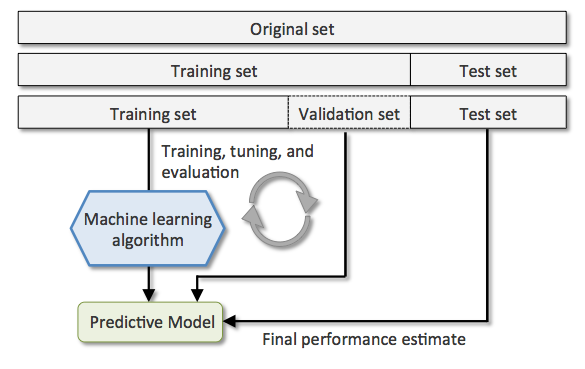

1. Desarrollar un modelo siempre implica ajustar su configuración.
2. La validación es una forma de aprendizaje.
3. Ajustar la configuración del modelo basado en su rendimiento durante la validación, puede resultar sobreajuste.


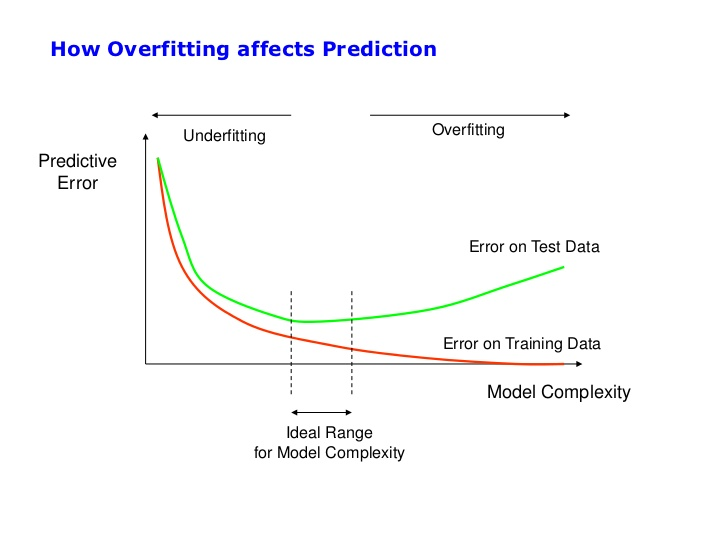

### FUGAS DE INFORMACIÓN
Validaciones que se pueden filtrar en el modelo = EN EXCESO AFECTA LA VALIDACIÓN DEL MODELO
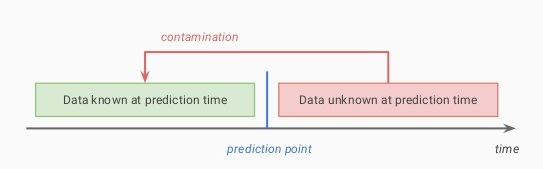

El modelo no debería tener acceso a ninguna información del Test Set, ni siquiera indirectamente.
Para ello existen procedimientos que permiten dividir los datos en conjuntos de entrenamiento, validación y pruebas:

### VALIDACIÓN SIMPLE HOLD-OUT
1. Fracción de datos como conjunto de prueba
2. También se reserva un conjunto de validación
3. Si hay pocos datos disponibles, los conjuntos de validación y prueba pueden contener muy pocas muestras para ser estadísticamente representativos de los datos disponibles.

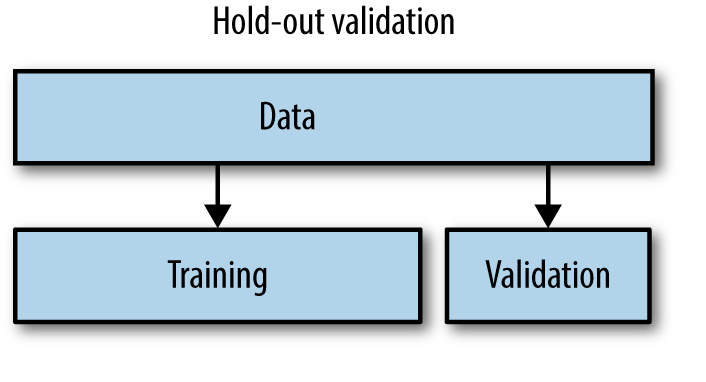

In [2]:
num_validation_samples = 10000
np.random.shuffle(data) # Mezclar los datos suele ser apropiado
validation_data = data[:num_validation_samples] #Se define el Set de Validación

data = data[num_validation_samples:]
training_data = data[:] # Se define el Set de entrenamiento

model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data) # Forma un modelo en los datos de entrenamiento y lo evalúa en los datos de validación.

model = get_model()
model.train(np.concatenate([training_data,
validation_data]))
test_score = model.evaluate(test_data) #Se entrena el modelo final desde cero en todos los datos disponibles que no sean de prueba.

NameError: name 'np' is not defined

### VALIDACIÓN K-FOLD
1. Divide los datos en particiones de igual tamaño (k)
2. El puntaje final es  el promedio de los puntajes K obtenidos.
3. Útil cuando el rendimiento del modelo muestra una variación significativa en función de su división más leve.

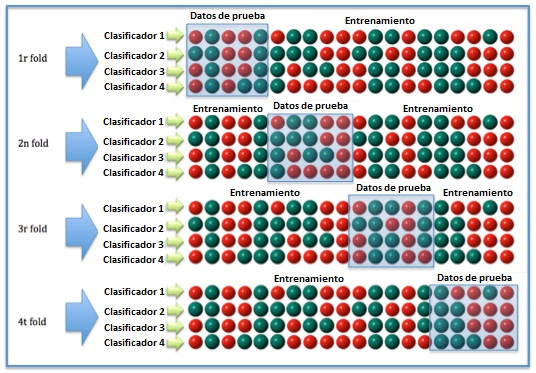

In [ ]:
k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k): #Selecciona la partición de datos de validación
    
validation_data = data[num_validation_samples * fold:
num_validation_samples * (fold + 1)]
training_data = data[:num_validation_samples * fold] +
data[num_validation_samples * (fold + 1):] #Utiliza el resto de los datos como datos de entrenamiento.
#Tenga en cuenta que el operador es la concatenación de listas, no la sumatoria.

model = get_model() # Crea una nueva instancia del modelo-sin entrenamiento
model.train(training_data)
validation_score = model.evaluate(validation_data)
validation_scores.append(validation_score)
validation_score = np.average(validation_scores) #Puntuación de validación: 
# Promedio de las puntuaciones de validación de los k pliegues

model = get_model()
model.train(data)
test_score = model.evaluate(test_data) # Entrena el modelo final en todos los datos no textuales disponibles

### VALIDACIÓN DE K-FOLD ITERADO
1. Se utiliza cuando hay pocos datos disponibles y se necesita evaluar su modelo con la mayor precisión posible.
2. Consiste en aplicar varias veces K Fold, barajando los datos cada vez antes de dividirlos en K.
3. El puntaje final es el promedio de los puntajes obtenidos en cada corrida de validación de K-fold
4. Se termina entrenando y evaluando modelos P × K (donde P es el número de iteraciones que usa), lo que puede ser muy costoso.

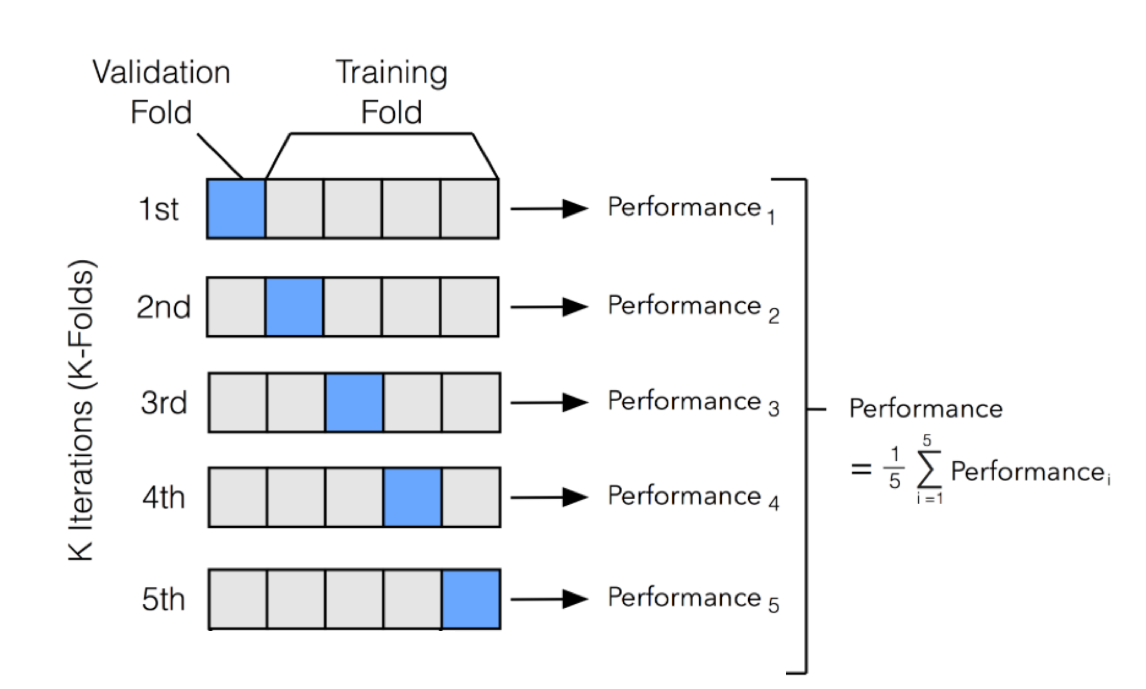

# Preprocesamiento de datos, ingeniería y aprendizaje de características

## ¿Cómo se preparan los datos de entrada y los objetivos antes de alimentarlos en una red neuronal?

### VECTORIZACIÓN
1. Todos los datos primeron deben ser convertidos en tensores = Vectorización de datos

### NORMALIZACIÓN DE VALOR
1. No es seguro alimentar datos de una red neuronal que toma valores relativamente grandes o datos que son heterogéneos.

##### Ejemplo: datos donde una característica está en el rango 0–1 y otra está en el rango 100–200). Hacerlo puede desencadenar grandes actualizaciones de gradiente que evitarán que la red converja

#### Para hacer el aprendizaje más fácil para su red, los datos deben tener las siguientes características:
1. Tomar valores pequeños: por lo general, la mayoría de los valores deben estar en el rango 0-1.
2. Ser homogéneo: todas las características deben tomar valores aproximadamente en el mismo rango.
3. Normalizar cada función independientemente para tener una media de 0.
4. Normalizar cada función independientemente para tener una desviación estándar de 1.


In [4]:
#Numpy arrays
x -= x.mean(axis=0)
x /= x.std(axis=0)

NameError: name 'x' is not defined

### MANEJO DE VALORES FALTANTES
1. Es seguro ingresar valores faltantes como 0, con la condición de que 0 ya no sea un valor significativo.
2. La red aprenderá de la exposición a los datos que el valor 0 significa que faltan datos y comenzará a ignorar el valor.
3. Es importante generar artificialmente muestras de entrenamiento con entradas faltantes

# INGENIERÍA DE CARACTERÍSTICAS

1. Los datos deben presentarse al modelo de una manera que facilite el trabajo del modelo.
2. Se requiere comprender el problema en profundidad.
3. Facilitar un problema expresándolo de una manera más simple.
4. Las buenas características permiten resolver un problema con muchos menos datos.
5. La capacidad de los modelos de DL para aprender características por sí mismos, depende de tener muchos datos de capacitación disponibles.

# Overfitting and underfitting

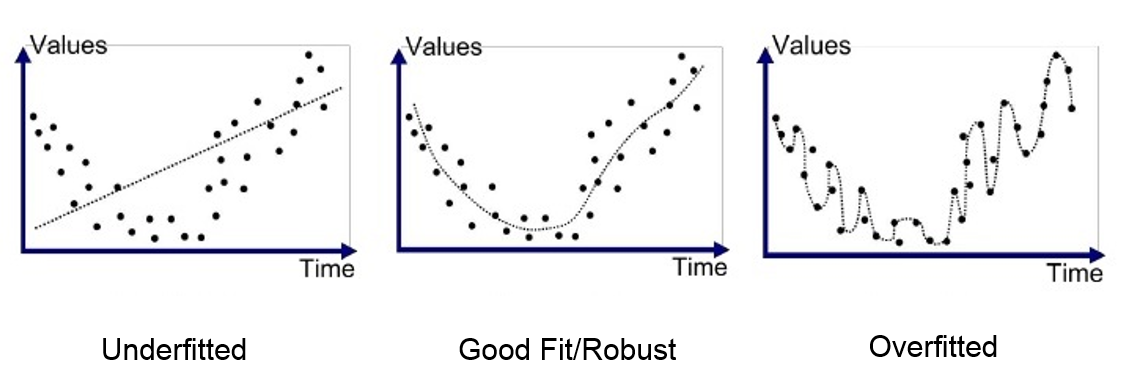


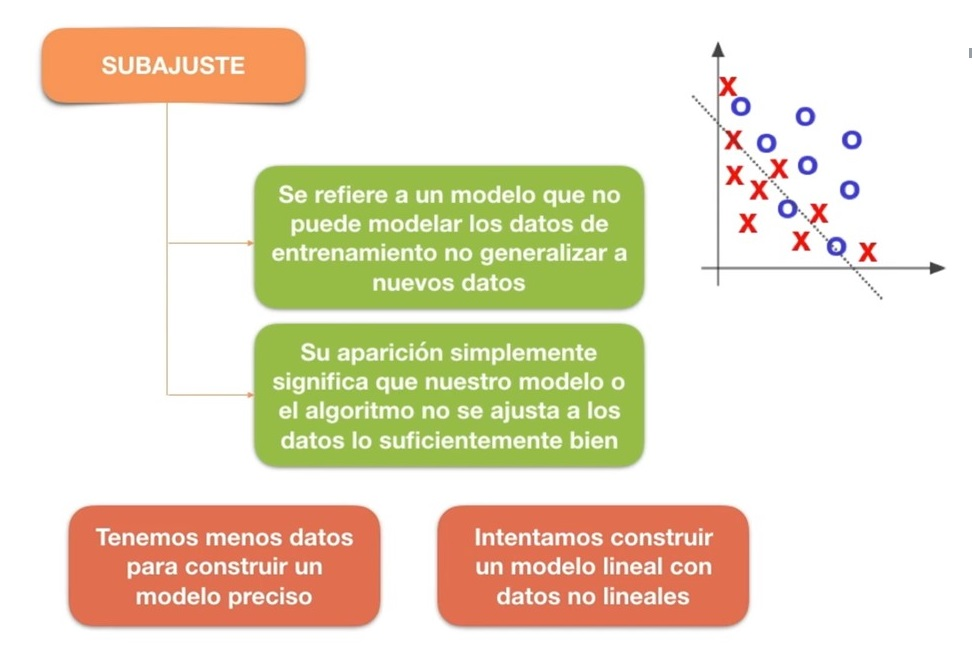
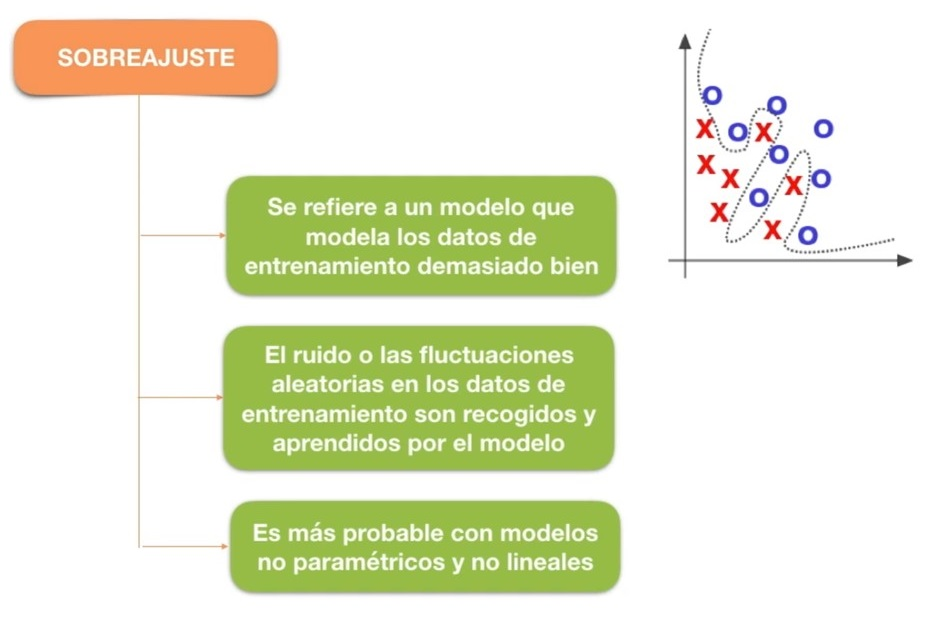

1. El sobreajuste ocurre en cada problema de aprendizaje automático.
2. Se debe tener en cuenta tensión entre la optimización y la generalización.

#### Optimización: proceso de ajustar un modelo para obtener el mejor rendimiento posible en los datos de entrenamiento.

#### Generalización: qué tan bien se desempeña el modelo entrenado en datos que nunca antes había visto => NO SE PUEDE CONTROLAR

### Momento 1
Optimización y generalización están correlacionadas: cuanto menor es la pérdida de datos de entrenamiento, menor es la pérdida de datos de prueba.

### Momento 2
* Después de cierto número de iteraciones en los datos de entrenamiento, la generalización deja de mejorar y las métricas de validación se estancan y comienzan a degradarse = SOBREAJUSTE

* Aprender patrones que son específicos de los datos de capacitación pero que son engañosos o irrelevantes cuando se trata de datos nuevos

### Para evitar que un modelo aprenda patrones engañosos o irrelevantes encontrados en los datos de entrenamiento, la mejor solución es obtener más datos de entrenamiento. 

# TÉCNICAS DE REGULARIZACIÓN

## A. Reducir el tamaño de la red
1. Reducir la cantidad de parámetros que se pueden aprender en el modelo (que está determinada por la cantidad de capas y la cantidad de unidades por capa).
2. El flujo de trabajo general para encontrar un tamaño de modelo apropiado es comenzar con relativamente pocas capas y parámetros, y aumentar el tamaño de las capas o agregar nuevas capas hasta que vea rendimientos decrecientes con respecto a la pérdida de validación.

In [5]:
# MODELO ORIGINAL
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# VERSIÓN DEL MODELO CON BAJA CAPACIDAD
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


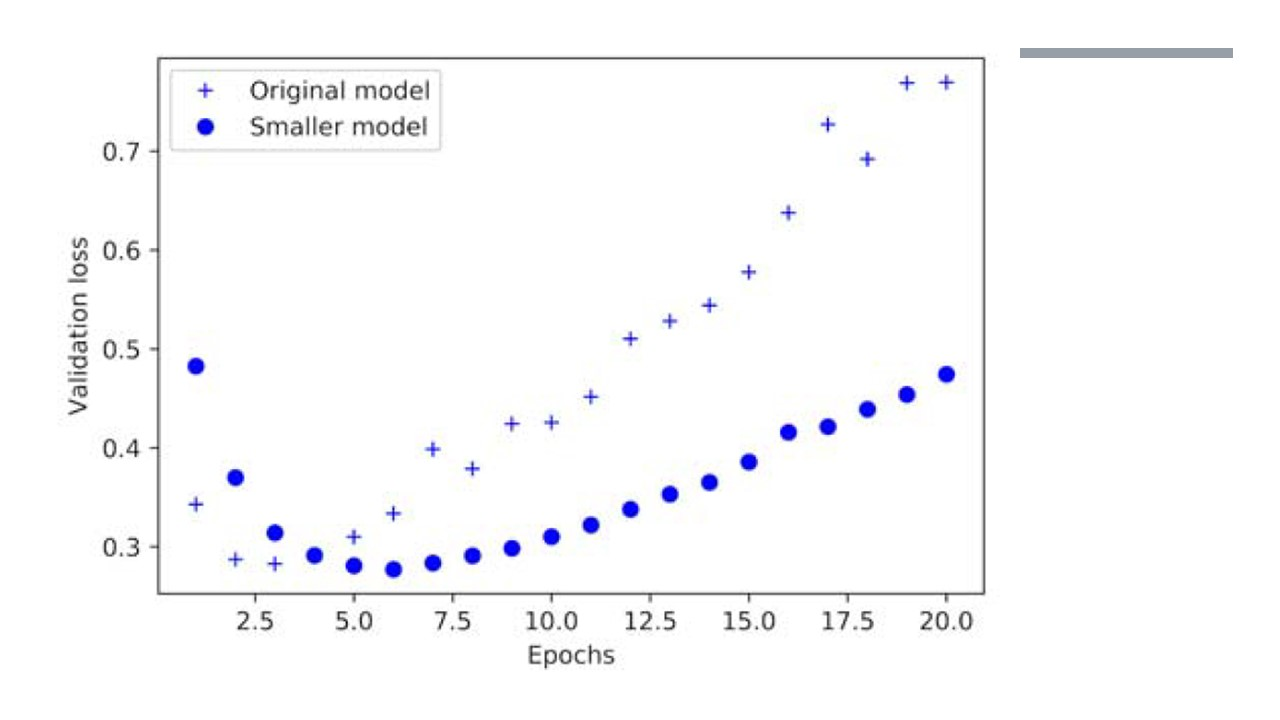

##### La red más pequeña comienza a sobreajustarse más tarde que la red de referencia (después de seis épocas en lugar de cuatro), y su rendimiento se degrada más lentamente una vez que comienza a sobreajustarse.

In [ ]:
# VERSIÓN DEL MODELO CON ALTA CAPACIDAD
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

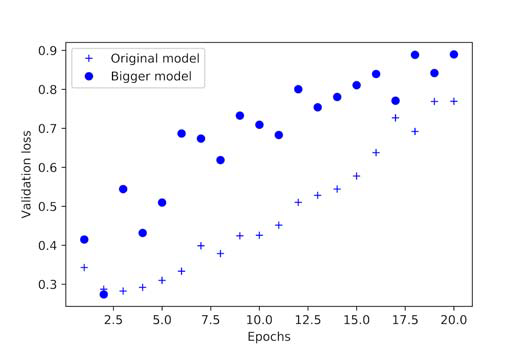

##### La red más grande comienza a sobreajustarse casi de inmediato, después de solo una época, y se sobreajusta mucho más severamente. Su pérdida de validación también es más ruidosa.

## B. Agregar regularización de peso

1. Navaja de Occam: Los modelos más simples tienen menos probabilidades de sobreajustarse.
2. Imponer restricciones a la complejidad de una red obligando a sus pesos a tomar solo valores pequeños, lo que hace que la distribución de los valores de peso sea más regular.

#### Regularización L1:
El costo agregado es proporcional al valor absoluto de los coeficientes de peso (la norma L1 de los pesos).

#### Regularización L2:
El costo agregado es proporcional al cuadrado del valor de los coeficientes de peso = DISMINUSIÓN DE PESO

En KERAS:

In [ ]:
#Agregar regularización de peso L2 al modelo

from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

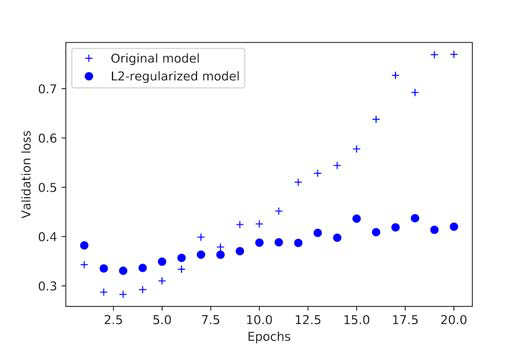


#### El modelo con regularización L2 (puntos) se ha vuelto mucho más resistente al sobreajuste que el modelo de referencia (cruces), a pesar de que ambos modelos tienen el mismo número de parámetros.

In [ ]:
from keras import regularizers
regularizers.l1(0.001) # Regularización L1
regularizers.l1_l2(l1=0.001, l2=0.001) #Regularización L1 y L2 simultánea

## C. AGREGAR DROPOUT

1. El abandono, aplicado a una capa, consiste en abandonar aleatoriamente (establecer en cero) una serie de características de salida de la capa durante el entrenamiento.


Considere una matriz de Numpy que contiene la salida de una capa, layer_output, of shape (batch_size, features). En el momento del entrenamiento, ponemos a cero al azar una fracción de los valores en la matriz:

In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
# En el momento del entrenamiento, elimina el 50% de las unidades en la salida

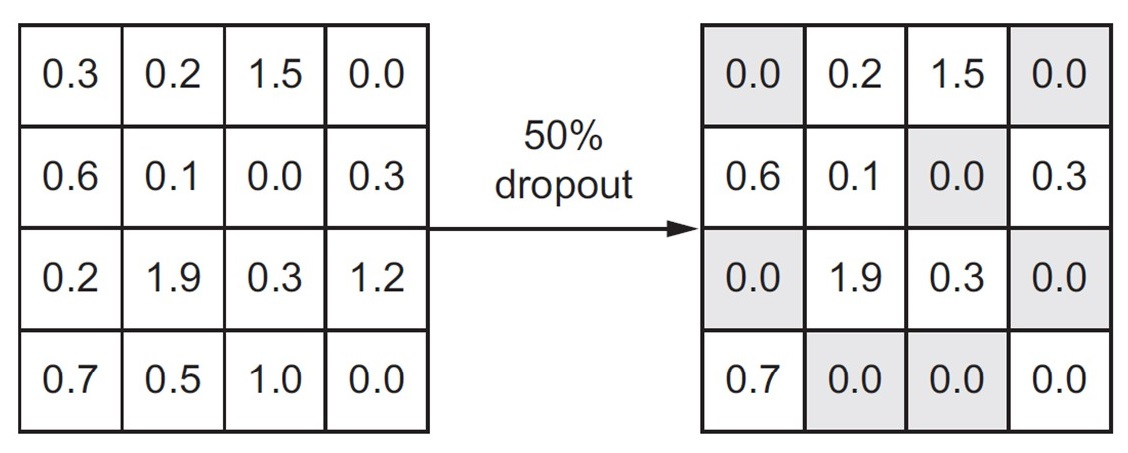

El drop out se aplicó a una matriz de activación en el momento del entrenamiento, y el cambio de escala se produce durante el entrenamiento. En el momento de la prueba, la matriz de activación no cambia.

In [ ]:
#Agregar Drop out en una red
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

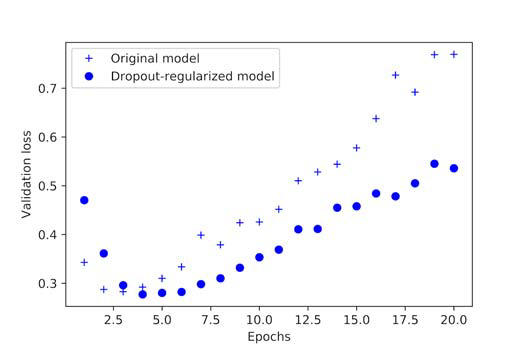

# The universal workflow of machine learning

## 1. DEFINIR EL PROBLEMA Y ENSAMBLAR EL DATASET = ¿QUÉ ESTÁ ENTRENANDO?
* Definir los datos de entrada
* ¿Qué se intenta predecir?
* ¿Se tienen los datos completos?
* ¿Qué tipo de problema se está enfrentando?
* ¿Qué tipo de clasificación es? (Binaria - Multiclase)
* ¿Qué tipo de Regresión es? (Escalar -  De vectores - Multiclase)
* Arquitectura del modelo - Claridad en el modelo

## 2. ELEGIR UNA MEDIDA DE ÉXITO = ¿PARA QUÉ SE ESTÁ OPTIMIZANDO?
* Se debe ser cuidadoso y muy analítico al momento de escoger la medida del modelo. 
* Visitar https://kaggle.com

## 3. DECIDIR SOBRE UN PROTOCOLO DE EVALUACIÓN = ¿CÓMO VA A EVALUAR?
* 1. Mantener validación Hold Out: cuando se tienen muchos datos
* 2. Realizar vaidación K-Fold: cuando tiene muy pocas muestras para que la validación de retención sea confiable
* 3. Realizar vaidación K-Fold Iterativa: para realizar una evaluación de modelo altamente precisa cuando hay pocos datos disponibles

## 4. PREPARAR DATA
* Los datos deben formatearse como tensores (Si, solo sí, se utiliza Tensorflow)
* Los valores tomados por estos tensores generalmente deben escalarse a valores pequeños: por ejemplo, en el rango [-1, 1] o [0, 1].
* Si diferentes características toman valores en diferentes rangos (datos heterogéneos), entonces los datos deben normalizarse.
* Funciones de ingeniería (Especialmente en problemas de datos pequeños).

## 5. DESARROLLAR UN MODELO QUE FUNCIONE MEJOR QUE UNA LÍNEA BASE
* OBJETIVO: lograr poder estadístico - PRECISIÓN
* Si no se cumplen las Hipótesis:

1. Probar cambios en las últimas capas.
2. Función de pérdida
3. Configuración de la optimización

#### Elegir la función correcta de activación y pérdida de última capa para su modelo
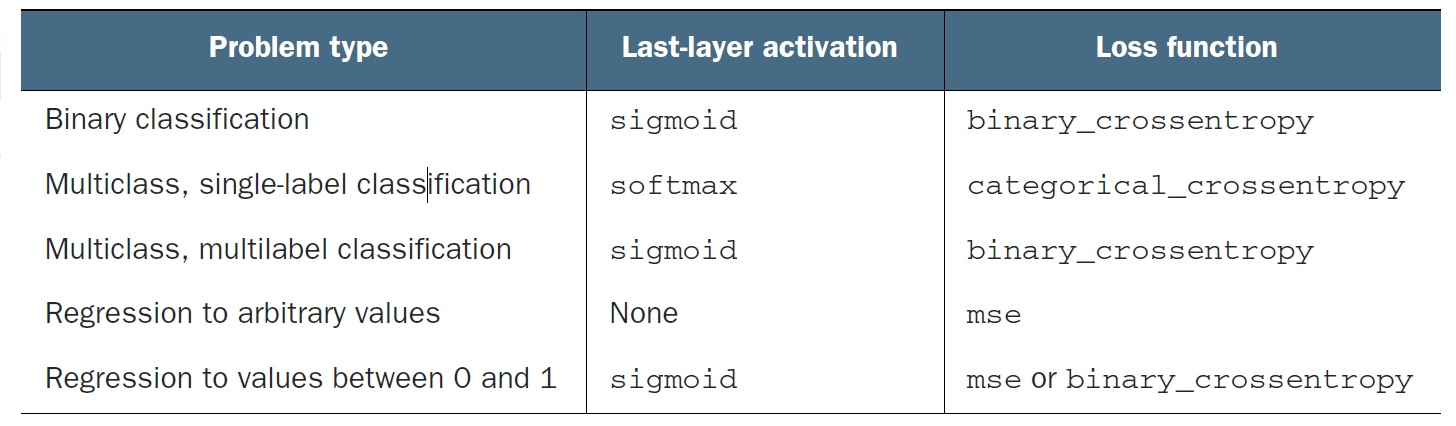

## 6. DESARROLLAR UN MODELO QUE SE ADAPTE

* El modelo ideal es uno que se encuentra justo en el límite entre el ajuste y el sobreajuste.
* Verificar que no exista underfitting ni overfitting
* desarrollar un modelo que se adapte en exceso; para ello:

1. Añadir capas.
2. Hacer las capas más grandes.
3. Entrenar para más épocas.

* Controlar la pérdida de capacitación y validación
* Regularizar y ajustar el modelo

## 7. REGULARIZAR EL MODELO Y AJUSTAR HIPERPARÁMETROS
* Añadir Drop Out.
* Probar diferentes arquitecturas: agreguar o eliminar capas.
* Agreguar  regularización L1 y/o L2.
* Probar diferentes hiperparámetros (como el número de unidades por capa o la velocidad de aprendizaje del optimizador) para encontrar la configuración óptima.
* Opcionalmente, repetir la ingeniería de características: agregar nuevas características o eliminar características que no parecen ser informativas.

# GLOSARIO DE CLASIFICACIÓN Y REGRESIÓN


### Muestra o entrada
Un punto de datos que entra en su modelo.

### Predicción o salida
Lo que sale de su modelo.

### Objetivo:
La verdad. Lo que su modelo debería haber predicho idealmente, según a una fuente externa de datos.

### Error de predicción o valor de pérdida
Una medida de la distancia entre la predicción de su modelo y el objetivo.

### Clases
Un conjunto de posibles etiquetas para elegir en un problema de clasificación. Por ejemplo, al clasificar imágenes de perros y gatos, "perro" y "gato" son las dos clases.

### Etiqueta
Una instancia específica de una anotación de clase en un problema de clasificación. Por ejemplo, si la imagen # 1234 se anota como que contiene la clase "perro", entonces "perro" es una etiqueta de la imagen # 1234.

### Ground-truth o anotaciones
Todos los objetivos de un conjunto de datos, generalmente recopilados por humanos.

### Clasificación binaria
Una tarea de clasificación donde cada muestra de entrada debe clasificarse en dos categorías exclusivas.

### Clasificación multiclase
Una tarea de clasificación donde cada muestra de entrada debe clasificarse en más de dos categorías: por ejemplo, clasificar dígitos escritos a mano.

### Clasificación de múltiples etiquetas
Una tarea de clasificación en la que a cada muestra de entrada se le pueden asignar múltiples etiquetas. Por ejemplo, una imagen dada puede contener tanto un gato y un perro y deben ser anotados con la etiqueta "gato" y la etiqueta "perro". El número de etiquetas por imagen suele ser variable.

### Regresión escalar
Una tarea donde el objetivo es un valor escalar continuo. Predecir los precios de la vivienda es un buen ejemplo: los diferentes precios objetivo forman un espacio continuo.

### Regresión de vectores
Una tarea en la que el objetivo es un conjunto de valores continuos: por ejemplo, un vector continuo. Si está haciendo una regresión contra múltiples valores (como las coordenadas de un cuadro delimitador en una imagen), entonces está haciendo una regresión vectorial.

### Mini-lote o lote
Un pequeño conjunto de muestras (generalmente entre 8 y 128) que el modelo procesa simultáneamente. El número de muestras suele ser una potencia de 2, para facilitar la asignación de memoria en la GPU. Cuando se entrena, se utiliza un mini lote para calcular una única actualización de descenso de gradiente aplicada a los pesos del modelo.
